# Logistic Regression 

## import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [3]:
fname_data = 'assignment_08_data.csv'

data        = np.genfromtxt(fname_data, delimiter=',')
number_data = data.shape[0]

point_x = data[:, 0]
point_y = data[:, 1]
label   = data[:, 2]

print('number of data = ', number_data)
print('data type of point x = ', point_x.dtype)
print('data type of point y = ', point_y.dtype)

point_x_class_0 = point_x[label == 0]
point_y_class_0 = point_y[label == 0]

point_x_class_1 = point_x[label == 1]
point_y_class_1 = point_y[label == 1]

number of data =  600
data type of point x =  float64
data type of point y =  float64


## plot the data

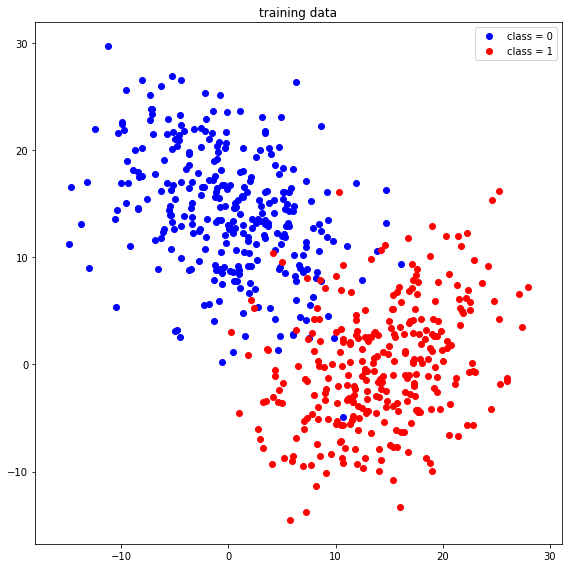

In [4]:
f = plt.figure(figsize=(8,8))   

plt.title('training data')
plt.plot(point_x_class_0, point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(point_x_class_1, point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \theta_2)$
- point = $(1, x, y) \in \mathbb{R}^3$

In [5]:
def compute_linear_regression(theta, point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # x,y는 실수값
    # f = thetaT * point
    # np.dot: 행렬곱, np.array 행렬 만들기
    # print(point.shape)
    value = np.dot(theta, point.T)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define sigmoid function with input

- $z \in \mathbb{R}$

In [6]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    value = 1 / (1 + np.exp(-z))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \theta_2) \in \mathbb{R}^3$
- point = $(1, x, y) \in \mathbb{R}^3$

In [7]:
def compute_logistic_regression(theta, point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # h = 로(f)
    z = compute_linear_regression(theta, point)

    value = sigmoid(z)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define the residual function

- $\theta = (\theta_0, \theta_1, \theta_2) \in \mathbb{R}^3$
- point $= (x, y) \in \mathbb{R}^2$
- label $= l \in \{0, 1\}$

In [8]:
def compute_residual(theta, point, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    h2 = compute_logistic_regression(theta, point)

    #residual = -(np.dot(label, np.log(h2))) - np.dot((1-label), np.log(1-h2))
    residual = -label * np.log(h2) - (1-label) * np.log(1-h2)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \theta_2) \in \mathbb{R}^3$
- point $= (1, x, y) \in \mathbb{R}^3$
- label $= l \in \{0, 1\}$

In [9]:
def compute_loss(theta, point, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #residual = compute_residual(theta, point, label)

    loss = (1/number_data)*np.sum(compute_residual(theta, point, label))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \theta_2) \in \mathbb{R}^3$
- point $= (1, x, y) \in \mathbb{R}^3$
- label $= l \in \{0, 1\}$

In [10]:
def compute_gradient(theta, point, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # loss의 gradient
    X = point.T
    h = compute_logistic_regression(theta, point)


    gradient = (1/number_data) * np.dot(X, (h-label))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient

## initialize the gradient descent algorithm

In [11]:
num_iteration   = 5000  # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.001 # USE THIS VALUE for the learning rate

theta           = np.array((0, 0, 0))
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration)

number_point_class_0    = len(point_x_class_0)
number_point_class_1    = len(point_x_class_1)

point_class_0   = np.ones((number_point_class_0, 3))
point_class_1   = np.ones((number_point_class_1, 3))

point_class_0[:, 1] = point_x_class_0
point_class_0[:, 2] = point_y_class_0
 
point_class_1[:, 1] = point_x_class_1
point_class_1[:, 2] = point_y_class_1

label_0     = np.zeros(number_point_class_0)
label_1     = np.ones(number_point_class_1)

point = np.concatenate((point_class_0, point_class_1), axis=0)
label = np.concatenate((label_0, label_1), axis=0)

print('shape of point_class_0 : ', point_class_0.shape)
print('shape of point_class_1 : ', point_class_1.shape)
print('shape of label_0 : ', label_0.shape)
print('shape of label_1 : ', label_1.shape)

print('shape of point : ', point.shape)
print('shape of label : ', label.shape)

shape of point_class_0 :  (300, 3)
shape of point_class_1 :  (300, 3)
shape of label_0 :  (300,)
shape of label_1 :  (300,)
shape of point :  (600, 3)
shape of label :  (600,)


## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [12]:
for i in range(num_iteration):
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # 
    theta   = theta - learning_rate *  compute_gradient(theta, point, label)
    loss    = compute_loss(theta, point, label)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    theta_iteration[i, :]   = theta
    loss_iteration[i]       = loss

theta_optimal = theta

___

___

## functions for presenting the results

___

___

In [13]:
def function_result_01():

    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])

    value = compute_linear_regression(input1, input2)
    
    print(value)

In [14]:
def function_result_02():
    
    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])

    value = compute_logistic_regression(input1, input2)

    print(value)

In [15]:
def function_result_03():

    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])
    input3  = np.array([0, 1])

    value = compute_residual(input1, input2, input3)

    print(value)

In [16]:
def function_result_04():
    
    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])
    input3  = np.array([[0], [1]])

    value = compute_loss(input1, input2, input3)

    print(value)

In [17]:
def function_result_05():
    
    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])
    input3  = np.array([[0], [1]])

    value = compute_gradient(input1, input2, input3)

    print(value)

In [18]:
def function_result_06():
    
    plt.figure(figsize=(8,6))
    plt.title('loss')

    plt.plot(loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [19]:
def function_result_07():
    
    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('model parameter')

    plt.plot(theta_iteration[:, 0], '-', color='red', label=r'$\theta_0$')
    plt.plot(theta_iteration[:, 1], '-', color='green', label=r'$\theta_1$')
    plt.plot(theta_iteration[:, 2], '-', color='blue', label=r'$\theta_2$')
    
    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

In [20]:
def function_result_08():

    X = np.arange(-20, 35, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(-20, 35, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # X,Y는 주어진 범위에서 그리드를 만드는 함수임, 간격: 0.1
    # 1. 간격에 따라 포인트 만들기
    # 2. h(theata*, x, y) = 로(f(theta*, x, y))
    # 3. regration 출력하기( 각 포인트에 대한 f(theta*, x, y)값을 빨/파 점으로 표현하기)
    # 4. f(theta*, x, y) = 0이되는 점을 기준으로 구분하기
    # class1 : 파란색, class2: 빨간색
    # 클라스 바운더리 = 0
    
    plt.figure(figsize=(8,8)) # 크기 
    plt.title('liner regression values') # 이름 추가
    
    X = XX.ravel()
    Y = YY.ravel()
    
    #print(((np.array([np.ones(X.size), X, Y])).T).shape)
    h = compute_linear_regression(theta_optimal, (np.array([np.ones(X.size), X, Y])).T)

    Z = h.reshape(XX.shape)

    cntr = plt.contourf(XX, YY, Z, levels = 90, cmap='RdBu_r')
    plt.colorbar(cntr)

    plt.scatter(point[:,1][label == 1], point[:,2][label == 1], c = "r", marker= ".", label= "class = 1") #red
    plt.scatter(point[:,1][label == 0], point[:,2][label == 0], c = "b", marker= ".", label = "class = 0") #blue
    
    plt.contour(XX, YY, Z,levels=[0], colors = "black")

    plt.axis('equal')
    
    plt.legend()
    plt.tight_layout()
    plt.show()


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

## plot the logistic regression values over the 2-dimensional Euclidean space

In [21]:
def function_result_09():

    X = np.arange(-20, 35, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(-20, 35, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # 리니어함수 대신 실제 클라스파이어 값을 보여주기!(h(theta*,x,y))
    # class = 0: 파랑, class = 1: 빨강, 있는 그대로 값 보여주기
    # 클라스 바운더리 = 0.5
    # hatH >= 0.5 -> l(x,y) = 1

    plt.figure(figsize=(8,8)) # 크기 조정
    X = XX.ravel()
    Y = YY.ravel()

    h = compute_logistic_regression(theta_optimal, (np.array([np.ones(X.size), X, Y])).T)

    Z = h.reshape(XX.shape)

    cntr = plt.contourf(XX, YY, Z, levels = 90, cmap = 'RdBu_r')

    plt.colorbar(cntr)

    #plt.contourf(grid_X, grid_Y, regression, levels=100, cmap='RdBu_r')
    #plt.colorbar()

    #plt.contour(grid_X, grid_Y, regression, levels=0, colors='black' )

    plt.scatter(point[:,1][label == 1], point[:,2][label == 1], c = "r", marker= ".", label= "class = 1")
    plt.scatter(point[:,1][label == 0], point[:,2][label == 0], c = "b", marker= ".", label = "class = 0")

    #plt.plot(data[(data[:,1] == 0), 0], data[(data[:,1] == 0), 1], '.', color='blue', label='class = 0')
    #plt.plot(data[(data[:,2] == 1), 0], data[(data[:,1] == 1), 1], '.', color='red', label='class = 1')
    
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
[ 1.4 -1.2]
**************************************************
## [RESULT 02]
**************************************************
[0.80218389 0.23147522]
**************************************************
## [RESULT 03]
**************************************************
[1.62041741 1.46328247]
**************************************************
## [RESULT 04]
**************************************************
0.005945666257521607
**************************************************
## [RESULT 05]
**************************************************
[[ 0.00100728 -0.00089508]
 [ 0.00333333  0.00333333]
 [ 0.005       0.005     ]]
**************************************************
## [RESULT 06]
**************************************************


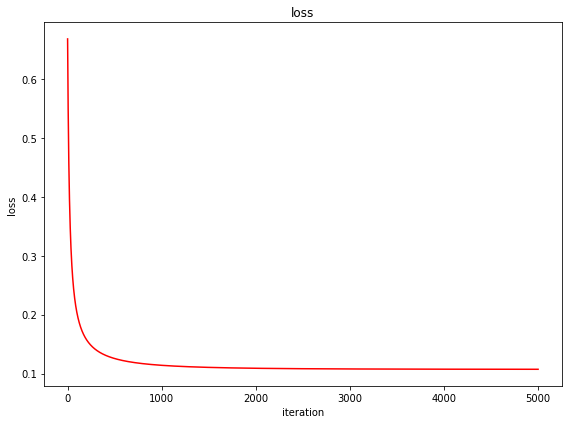

**************************************************
## [RESULT 07]
**************************************************


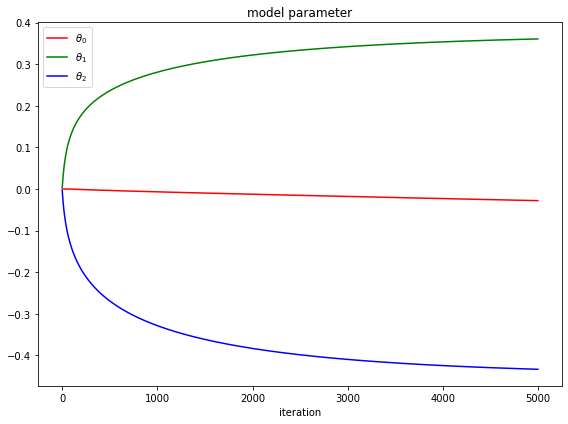

**************************************************
## [RESULT 08]
**************************************************


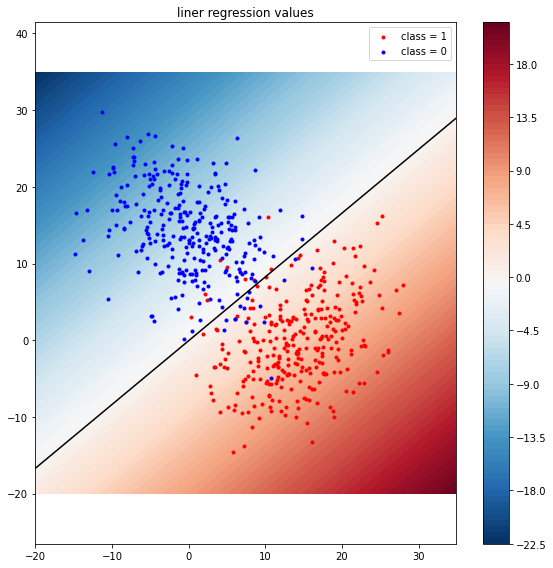

**************************************************
## [RESULT 09]
**************************************************


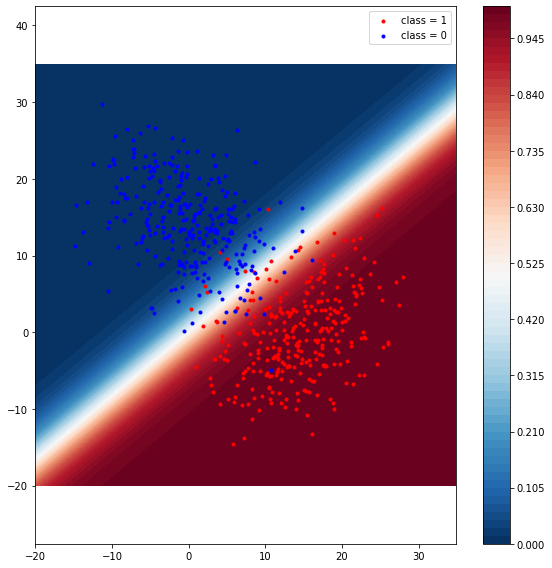

In [22]:
number_result = 9

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)